In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import seaborn as sns
%pylab inline
pd.set_option('display.max_columns',None)
pd.options.display.max_seq_items = 2000
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import requests, re
import pandas as pd
import seaborn as sns
import nltk
import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
# from gensim.corpora.dictionary import Dictionary
# from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')

Populating the interactive namespace from numpy and matplotlib
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rec', 'Text', 'test', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


True

In [0]:
from pathlib import Path
import numpy as np
import pickle
import operator
import os
os.chdir('/content/drive/My Drive/Yelp Data')

References:
* https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5

In [0]:
pathData = Path('/content/drive/My Drive/Yelp Data')
dfBusiness = pd.read_csv(pathData.joinpath('yelp_business.csv'))
dfBusiness.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [0]:
dfReviews = pd.read_csv(pathData.joinpath('yelp_review.csv'))
dfReviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [0]:
with open('business_df.pickle', 'wb') as f:
    pickle.dump(dfBusiness, f)

In [0]:
with open('reviews_df.pickle', 'wb') as f:
    pickle.dump(dfReviews, f)

In [0]:
with open('business_df.pickle', 'rb') as f:
    dfBusiness = pickle.load(f)


In [0]:

with open('reviews_df.pickle', 'rb') as f:
    dfReviews = pickle.load(f)

In [0]:
dfRestaurants=dfBusiness[dfBusiness['categories'].str.contains('Restaurants', na=False)]
dfRestaurants.dropna(inplace=True)
dfRestaurants["stars"].value_counts()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4.0    6434
3.5    6228
3.0    4223
4.5    3053
2.5    2281
2.0    1089
5.0     628
1.5     418
1.0     111
Name: stars, dtype: int64

In [0]:
print("Filtered data with restaurants :",dfRestaurants.shape)

Filtered data with restaurants : (24465, 13)


Text(0.5, 0, 'City ')

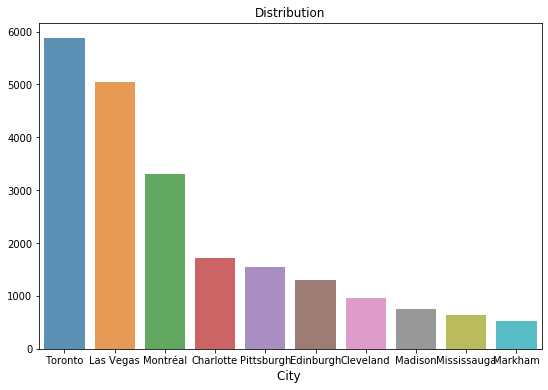

In [0]:
x = dfRestaurants['city'].value_counts().index
y = dfRestaurants['city'].value_counts().values
plt.figure(figsize=(9,6))
ax= sns.barplot(x[:10], y[:10],data= dfRestaurants ,alpha=0.8 )
plt.title("Distribution")
plt.xlabel('City ', fontsize=12)

Text(0.5, 0, 'Ratings ')

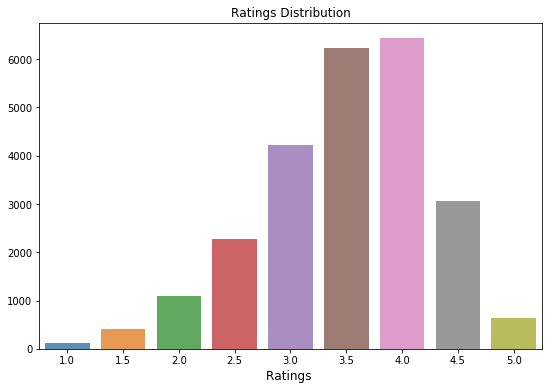

In [0]:
x = dfRestaurants['stars'].value_counts().index
y = dfRestaurants['stars'].value_counts().values
plt.figure(figsize=(9,6))
ax= sns.barplot(x, y,data= dfRestaurants ,alpha=0.8 )
plt.title("Ratings Distribution")
plt.xlabel('Ratings ', fontsize=12)

In [0]:
dfRestaurants[dfRestaurants.city=='Toronto']

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",Yonge and Eglinton,"""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,Italian;French;Restaurants
25,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,3.5,39,1,Tiki Bars;Nightlife;Mexican;Restaurants;Bars
96,dTWfATVrBfKj7Vdn0qWVWg,"""Flavor Cuisine""",Scarborough,"""8 Glen Watford Drive""",Toronto,ON,M1S 2C1,43.787061,-79.276166,3.0,6,1,Restaurants;Chinese;Food Court
104,1nhf9BPXOBFBkbRkpsFaxA,"""Mirage Grill & Lounge""",Yonge and Eglinton,"""117 Eglinton Avenue E""",Toronto,ON,M4P 1H4,43.707465,-79.394285,2.0,6,0,Breakfast & Brunch;Food;Coffee & Tea;Canadian ...
113,sJ0MYSAIVK28cMzh-s-NPA,"""Amaya Express""",Downtown Core,"""Eaton Centre, 220 Yonge St""",Toronto,ON,M5B 2L7,43.654067,-79.380081,2.5,34,1,Indian;Restaurants;Fast Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174507,3zIy2T1bRwxvK-dRmopS_g,"""Ali Baba""",Yorkville,"""840 Yonge Street""",Toronto,ON,M4W 2H1,43.671578,-79.387460,1.0,4,1,Middle Eastern;Restaurants
174518,sEAKw3MZkER1u_1fzIeD3g,"""Gol Take-Out""",Willowdale,"""5 Spring Garden Avenue""",Toronto,ON,M2N 3G1,43.764386,-79.411206,4.0,15,1,Food;Restaurants;International Grocery;Ethnic ...
174519,1HplwLVbBid-Bgw1sEPGFg,"""Dumpling Melody Bistro""",Etobicoke,"""3266 W Lake Shore Boulevard""",Toronto,ON,M8V 1M4,43.596858,-79.523305,2.0,12,1,Restaurants;Chinese
174536,xqNpOnxY0XzdnUE4sjmg0w,"""Chaska""",St. Lawrence,"""125 Lower Jarvis St""",Toronto,ON,M5E 1Z6,43.648705,-79.370885,4.0,4,0,Food;Grocery;Restaurants;Coffee & Tea;Indian


In [0]:
dfRestaurants = dfRestaurants[dfRestaurants.city=='Toronto']

In [0]:
with open('dfRestaurants.pickle','wb') as f:
  pickle.dump(dfRestaurants, f)

In [0]:

dfRestaurants = dfRestaurants[['business_id','categories']]

categories = dfRestaurants.categories.unique()
categories

array(['Italian;French;Restaurants',
       'Tiki Bars;Nightlife;Mexican;Restaurants;Bars',
       'Restaurants;Chinese;Food Court', ...,
       'Food;Restaurants;International Grocery;Ethnic Grocery;Persian/Iranian',
       'Food;Grocery;Restaurants;Coffee & Tea;Indian',
       'Nightlife;Restaurants;Sandwiches;Bars;Canadian (New);Asian Fusion;Pubs'],
      dtype=object)

In [0]:
# Extract all the unique categories from the columns exclusing 'restaurants'
def getUniqueCategories(categories):
    uniqueCategories = []
    for catStr in categories:
        catList = catStr.split(';')
        if len(catList):
            temp = [word.strip() for word in catList if (word.strip() != 'Restaurants' and word.strip() not in uniqueCategories)]
            uniqueCategories.extend(temp)
    return uniqueCategories

uniqueCategories = getUniqueCategories(categories)

In [0]:
len(uniqueCategories)
# Value for Las Vegas was 375

300

In [0]:
catCount = []
for cat in uniqueCategories:
  catCount.append(len(dfBusiness[dfBusiness['categories'].str.contains(cat)]))

dfCatCount = pd.DataFrame({'category':uniqueCategories,'count':catCount})

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [0]:
dfCatCount.sort_values(by=['count'], ascending=False)

,category,count
9,Food,31211
101,Shopping,27971
215,Beauty & Spas,17014
262,Home Services,16205
247,Health & Medical,14230
5,Bars,13908
3,Nightlife,12154
64,Local Services,11232
243,Automotive,11052
60,Event Planning & Services,9078


In [0]:
dfCatCount.describe()
# dfCatCount.sort_values(by='count')

,count
count,300.000000
mean,1368.760000
std,3375.434498
min,0.000000
25%,76.500000
50%,279.500000
75%,1108.250000
max,31211.000000


In [0]:
uniqueCategoriesFiltered = dfCatCount[dfCatCount['count']>76].category.values

In [0]:
print('Number of Categories with more than 76 occurences: ',len(uniqueCategoriesFiltered))

Number of Categories with more than 76 occurences:  225


In [0]:
uniqueCategoriesFilteredSet = set(uniqueCategoriesFiltered)
def splitCategories(catString):
  catList = catString.split(';')
  if len(catList):
      # temp = [word.strip() for word in catList if word.strip() != 'Restaurants']
      temp = []
      for word in catList:
        if word.strip() != 'Restaurants':
          if word.strip() not in uniqueCategoriesFilteredSet:
            temp.append('Others')
          else:
            temp.append(word.strip())
  else:
    return []
  return temp


In [0]:
uniqueCategoriesFilteredSet

In [0]:
dfRestaurantsFiltered = dfRestaurants.copy()
dfRestaurantsFiltered['categories'] = dfRestaurants.apply(lambda x: splitCategories(x['categories']), axis=1)

In [0]:
print('Nightlife' in uniqueCategoriesFilteredSet)
dfRestaurants

True


,business_id,categories
15,l09JfMeQ6ynYs5MCJtrcmQ,Italian;French;Restaurants
25,1K4qrnfyzKzGgJPBEcJaNQ,Tiki Bars;Nightlife;Mexican;Restaurants;Bars
96,dTWfATVrBfKj7Vdn0qWVWg,Restaurants;Chinese;Food Court
104,1nhf9BPXOBFBkbRkpsFaxA,Breakfast & Brunch;Food;Coffee & Tea;Canadian ...
113,sJ0MYSAIVK28cMzh-s-NPA,Indian;Restaurants;Fast Food
...,...,...
174507,3zIy2T1bRwxvK-dRmopS_g,Middle Eastern;Restaurants
174518,sEAKw3MZkER1u_1fzIeD3g,Food;Restaurants;International Grocery;Ethnic ...
174519,1HplwLVbBid-Bgw1sEPGFg,Restaurants;Chinese
174536,xqNpOnxY0XzdnUE4sjmg0w,Food;Grocery;Restaurants;Coffee & Tea;Indian


In [0]:
# len(dfRestaurantsFiltered[dfRestaurantsFiltered['categories'].str.contains('Bars', na=False)])
# # len(dfRestaurantsFiltered[dfRestaurantsFiltered['categories'].str.contains('Others')])

# dfRestaurantsFiltered

In [0]:
dfRestaurantsFiltered

,business_id,categories
15,l09JfMeQ6ynYs5MCJtrcmQ,"[Italian, French]"
25,1K4qrnfyzKzGgJPBEcJaNQ,"[Others, Nightlife, Mexican, Bars]"
96,dTWfATVrBfKj7Vdn0qWVWg,"[Chinese, Food Court]"
104,1nhf9BPXOBFBkbRkpsFaxA,"[Breakfast & Brunch, Food, Coffee & Tea, Others]"
113,sJ0MYSAIVK28cMzh-s-NPA,"[Indian, Fast Food]"
...,...,...
174507,3zIy2T1bRwxvK-dRmopS_g,[Middle Eastern]
174518,sEAKw3MZkER1u_1fzIeD3g,"[Food, International Grocery, Others, Persian/..."
174519,1HplwLVbBid-Bgw1sEPGFg,[Chinese]
174536,xqNpOnxY0XzdnUE4sjmg0w,"[Food, Grocery, Coffee & Tea, Indian]"


In [0]:
dfReviews = dfReviews[['business_id','stars','text']]
dfReviews.head()

,business_id,stars,text
0,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...
1,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...
2,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...
3,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...
4,s2I_Ni76bjJNK9yG60iD-Q,4,Had their chocolate almond croissant and it wa...


In [0]:
dfData = pd.merge(dfRestaurantsFiltered, dfReviews, on='business_id', how='left')

In [0]:
dfData[['business_id','text']].groupby(['business_id']).agg('count')

,text
business_id,
--DaPTJW3-tB1vP-PfdTEg,39
--SrzpvFLwP_YFwB_Cetow,44
-0NhdsDJsdarxyDPR523ZQ,22
-0RRiWDtfnS16AKCtfvBZg,5
-0aOudcaAyac0VJbMX-L1g,13
...,...
zy_NHTqtfSrfTGGPoqy4Mw,19
zyw5DjrRks7a8OhmBsgCQQ,90
zz3CqZhNx2rQ_Yp6zHze-A,48


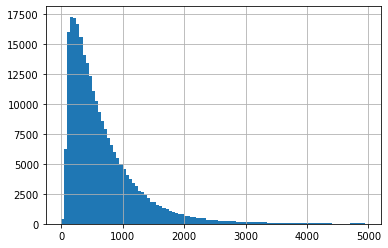

In [0]:
lens = dfData.text.str.len()
lens.hist(bins = np.arange(0,5000,50))

In [0]:
# Method to clean review text
def getClean(sen):
    sen = sen.lower()
    sen = re.sub(r"\'d", " would ", sen)
    sen = re.sub(r"\'ve", " have ", sen)
    sen = re.sub(r"can't", "can not ", sen)
    sen = re.sub(r"\'ll", " will ", sen)
    sen = re.sub(r"n't", " not ", sen)
    sen = re.sub(r"\'scuse", " excuse ", sen)
    sen = re.sub(r"what's", "what is ", sen)
    sen = re.sub(r"i'm", "i am ", sen)
    sen = re.sub(r"\'s", " ", sen)
    sen = re.sub(r"\'re", " are ", sen)
    sen = re.sub('\W', ' ', sen)
    sen = re.sub('\s+', ' ', sen)
    sen = sen.strip(' ')
    return sen

In [0]:
dfData['text'] = dfData['text'].map(lambda com : getClean(com))

In [0]:
dfData

,business_id,categories,stars,text
0,l09JfMeQ6ynYs5MCJtrcmQ,"[Italian, French]",4,wow this has to be the cutest restaurant in to...
1,l09JfMeQ6ynYs5MCJtrcmQ,"[Italian, French]",1,failure to communicate is an understatement my...
2,l09JfMeQ6ynYs5MCJtrcmQ,"[Italian, French]",5,hoorah yelp review 100 and i crossed a boarder...
3,l09JfMeQ6ynYs5MCJtrcmQ,"[Italian, French]",3,been here a few times and polite staff with go...
4,l09JfMeQ6ynYs5MCJtrcmQ,"[Italian, French]",2,so we had a deal find coupon for this restaura...
...,...,...,...,...
259097,SvW3WsatQWvR8c1iwAD_QA,"[Nightlife, Sandwiches, Bars, Others, Asian Fu...",4,a great choice to have affordable drinks and d...
259098,SvW3WsatQWvR8c1iwAD_QA,"[Nightlife, Sandwiches, Bars, Others, Asian Fu...",5,this place can not be beat by any other bar pu...
259099,SvW3WsatQWvR8c1iwAD_QA,"[Nightlife, Sandwiches, Bars, Others, Asian Fu...",5,truly a friendly nice vibe entrés are 9 bucks ...
259100,SvW3WsatQWvR8c1iwAD_QA,"[Nightlife, Sandwiches, Bars, Others, Asian Fu...",5,great place i went to a meetup event at anothe...


In [0]:
with open('data_df.pickle', 'wb') as f:
    pickle.dump(dfData, f)

In [0]:
with open('data_df.pickle','rb') as f:
  dfData = pickle.load(f)

In [0]:
dfData

,business_id,categories,stars,text
0,l09JfMeQ6ynYs5MCJtrcmQ,"[Italian, French]",4,wow this has to be the cutest restaurant in to...
1,l09JfMeQ6ynYs5MCJtrcmQ,"[Italian, French]",1,failure to communicate is an understatement my...
2,l09JfMeQ6ynYs5MCJtrcmQ,"[Italian, French]",5,hoorah yelp review 100 and i crossed a boarder...
3,l09JfMeQ6ynYs5MCJtrcmQ,"[Italian, French]",3,been here a few times and polite staff with go...
4,l09JfMeQ6ynYs5MCJtrcmQ,"[Italian, French]",2,so we had a deal find coupon for this restaura...
...,...,...,...,...
259097,SvW3WsatQWvR8c1iwAD_QA,"[Nightlife, Sandwiches, Bars, Others, Asian Fu...",4,a great choice to have affordable drinks and d...
259098,SvW3WsatQWvR8c1iwAD_QA,"[Nightlife, Sandwiches, Bars, Others, Asian Fu...",5,this place can not be beat by any other bar pu...
259099,SvW3WsatQWvR8c1iwAD_QA,"[Nightlife, Sandwiches, Bars, Others, Asian Fu...",5,truly a friendly nice vibe entrés are 9 bucks ...
259100,SvW3WsatQWvR8c1iwAD_QA,"[Nightlife, Sandwiches, Bars, Others, Asian Fu...",5,great place i went to a meetup event at anothe...


In [0]:
yelp_review_tokens = dfData.text.sum()
yelp_review_vocabulary = nltk.FreqDist(yelp_review_tokens.split())
sorted(yelp_review_vocabulary.items(),key=operator.itemgetter(1),reverse=True)

In [0]:
dfDataChunk = dfData # [0:100]
stemmer = SnowballStemmer("english")
def stemming(sentence):
    temp = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        temp += stem + " "
    return temp.strip()
dfDataChunk['text'] = dfDataChunk['text'].apply(stemming)

In [0]:
# yelp_review_tokens = dfDataChunk.text.sum()


In [0]:
dfDataChunk = dfDataChunk[['categories','text']]
dfDataChunk

,categories,text
0,"[Italian, French]",wow this has to be the cutest restaur in toron...
1,"[Italian, French]",failur to communic is an understat my sister a...
2,"[Italian, French]",hoorah yelp review 100 and i cross a boarder t...
3,"[Italian, French]",been here a few time and polit staff with good...
4,"[Italian, French]",so we had a deal find coupon for this restaur ...
...,...,...
259097,"[Nightlife, Sandwiches, Bars, Others, Asian Fu...",a great choic to have afford drink and decent ...
259098,"[Nightlife, Sandwiches, Bars, Others, Asian Fu...",this place can not be beat by ani other bar pu...
259099,"[Nightlife, Sandwiches, Bars, Others, Asian Fu...",truli a friend nice vibe entré are 9 buck home...
259100,"[Nightlife, Sandwiches, Bars, Others, Asian Fu...",great place i went to a meetup event at anoth ...


In [0]:
stop_words = set(stopwords.words('english'))
# stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    # stop_words = set(stopwords.words('english'))
    return re_stop_words.sub(" ", sentence)
dfDataChunk['text'] = dfDataChunk['text'].apply(removeStopWords)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


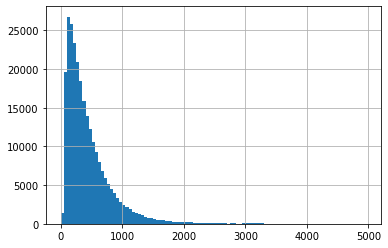

In [0]:
lens = dfDataChunk.text.str.len()
lens.hist(bins = np.arange(0,5000,50))

In [0]:
yelp_review_tokens = dfDataChunk[0:100].text.sum()
yelp_review_vocabulary = nltk.FreqDist(yelp_review_tokens.split())
sorted(yelp_review_vocabulary.items(),key=operator.itemgetter(1),reverse=True)

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
df = dfDataChunk.copy()
mlb = MultiLabelBinarizer()
dfOnehot = df.join(pd.DataFrame(mlb.fit_transform(df.pop('categories')),
                          columns=mlb.classes_,
                          index=df.index))

In [0]:
dfOnehot

,text,Accessories,Accountants,Active Life,Afghan,African,Antiques,Arcades,Art Classes,Art Galleries,Art Schools,Arts & Crafts,Arts & Entertainment,Asian Fusion,Automotive,Bagels,Bakeries,Barbeque,Bars,Beauty & Spas,Beer,Beer Bar,Bistros,Books,Bookstores,Brasseries,Brazilian,Breakfast & Brunch,Breweries,British,Bubble Tea,Buffets,Burgers,Butcher,Cafes,Cajun/Creole,Candy Stores,Cannabis Clinics,Cantonese,Caribbean,Casinos,Caterers,Cheese Shops,Cheesesteaks,Chicken Shop,Chicken Wings,Chinese,Chocolatiers & Shops,Churches,Cocktail Bars,Coffee & Tea,Coffee Roasteries,Comedy Clubs,Comfort Food,Comic Books,Community Service/Non-Profit,Convenience Stores,Cooking Schools,Couriers & Delivery Services,Creperies,Custom Cakes,Dance Clubs,Day Spas,Delicatessen,Delis,Department Stores,Desserts,Dim Sum,Diners,Discount Store,Dive Bars,Do-It-Yourself Food,Donuts,Dry Cleaning & Laundry,Education,Escape Games,Ethnic Food,Event Planning & Services,Falafel,Farmers Market,Fashion,Fast Food,Festivals,Filipino,Financial Services,Fish & Chips,Florists,Flowers & Gifts,Food,Food Court,Food Delivery Services,Food Stands,Food Trucks,French,Fruits & Veggies,Gas Stations,Gastropubs,Gay Bars,Gelato,German,Gift Shops,Gluten-Free,Greek,Grocery,Hair Salons,Halal,Hawaiian,Head Shops,Health & Medical,Health Markets,Hobby Shops,Home & Garden,Home Decor,Home Services,Hookah Bars,Hot Dogs,Hot Pot,Hotels,Hotels & Travel,IT Services & Computer Repair,Ice Cream & Frozen Yogurt,Imported Food,Indian,International,International Grocery,Internet Cafes,Irish,Irish Pub,Italian,Japanese,Jazz & Blues,Juice Bars & Smoothies,Karaoke,Kebab,Korean,Kosher,Latin American,Lebanese,Life Coach,Local Flavor,Local Services,Lounges,Mags,Marketing,Massage,Meat Shops,Mediterranean,Men's Clothing,Mexican,Middle Eastern,Mobile Phone Repair,Modern European,Music & Video,Music Venues,Nightlife,Noodles,Nutritionists,Organic Stores,Others,Pakistani,Pan Asian,Party & Event Planning,Patisserie/Cake Shop,Performing Arts,Persian/Iranian,Personal Chefs,Peruvian,Pizza,Playgrounds,Plumbing,Poke,Pool Halls,Portuguese,Poutineries,Professional Services,Pubs,Ramen,Religious Organizations,Salad,Sandwiches,Scottish,Seafood,Seafood Markets,Shopping,Shopping Centers,Skin Care,Social Clubs,Soul Food,Soup,Southern,Spanish,Specialty Food,Specialty Schools,Sports Bars,Steakhouses,Street Vendors,Sushi Bars,Szechuan,Taiwanese,Tapas Bars,Tapas/Small Plates,Tax Services,Tea Rooms,Tex-Mex,Thai,Tobacco Shops,Toy Stores,Turkish,Vape Shops,Vegan,Vegetarian,Venues & Event Spaces,Video Game Stores,Videos & Video Game Rental,Vietnamese,Vinyl Records,Vitamins & Supplements,Waffles,Web Design,Wedding Planning,Wholesale Stores,Wigs,Wine & Spirits,Wine Bars,Wineries,Women's Clothing,Wraps
0,wow cutest restaur toronto remind nyc...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,failur communic understat sister brother ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,hoorah yelp review 100 cross boarder get ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
with open('dfOnehot.pickle','wb') as f:
  pickle.dump(dfOnehot,f)


In [0]:
with open('dfOnehot.pickle','rb') as f:
  dfOnehot = pickle.load(f)

In [0]:
dfOnehot = dfOnehot.iloc[:1000]

In [0]:
dfOnehot

,text,Accessories,Accountants,Active Life,Afghan,African,Antiques,Arcades,Art Classes,Art Galleries,Art Schools,Arts & Crafts,Arts & Entertainment,Asian Fusion,Automotive,Bagels,Bakeries,Barbeque,Bars,Beauty & Spas,Beer,Beer Bar,Bistros,Books,Bookstores,Brasseries,Brazilian,Breakfast & Brunch,Breweries,British,Bubble Tea,Buffets,Burgers,Butcher,Cafes,Cajun/Creole,Candy Stores,Cannabis Clinics,Cantonese,Caribbean,Casinos,Caterers,Cheese Shops,Cheesesteaks,Chicken Shop,Chicken Wings,Chinese,Chocolatiers & Shops,Churches,Cocktail Bars,Coffee & Tea,Coffee Roasteries,Comedy Clubs,Comfort Food,Comic Books,Community Service/Non-Profit,Convenience Stores,Cooking Schools,Couriers & Delivery Services,Creperies,Custom Cakes,Dance Clubs,Day Spas,Delicatessen,Delis,Department Stores,Desserts,Dim Sum,Diners,Discount Store,Dive Bars,Do-It-Yourself Food,Donuts,Dry Cleaning & Laundry,Education,Escape Games,Ethnic Food,Event Planning & Services,Falafel,Farmers Market,Fashion,Fast Food,Festivals,Filipino,Financial Services,Fish & Chips,Florists,Flowers & Gifts,Food,Food Court,Food Delivery Services,Food Stands,Food Trucks,French,Fruits & Veggies,Gas Stations,Gastropubs,Gay Bars,Gelato,German,Gift Shops,Gluten-Free,Greek,Grocery,Hair Salons,Halal,Hawaiian,Head Shops,Health & Medical,Health Markets,Hobby Shops,Home & Garden,Home Decor,Home Services,Hookah Bars,Hot Dogs,Hot Pot,Hotels,Hotels & Travel,IT Services & Computer Repair,Ice Cream & Frozen Yogurt,Imported Food,Indian,International,International Grocery,Internet Cafes,Irish,Irish Pub,Italian,Japanese,Jazz & Blues,Juice Bars & Smoothies,Karaoke,Kebab,Korean,Kosher,Latin American,Lebanese,Life Coach,Local Flavor,Local Services,Lounges,Mags,Marketing,Massage,Meat Shops,Mediterranean,Men's Clothing,Mexican,Middle Eastern,Mobile Phone Repair,Modern European,Music & Video,Music Venues,Nightlife,Noodles,Nutritionists,Organic Stores,Others,Pakistani,Pan Asian,Party & Event Planning,Patisserie/Cake Shop,Performing Arts,Persian/Iranian,Personal Chefs,Peruvian,Pizza,Playgrounds,Plumbing,Poke,Pool Halls,Portuguese,Poutineries,Professional Services,Pubs,Ramen,Religious Organizations,Salad,Sandwiches,Scottish,Seafood,Seafood Markets,Shopping,Shopping Centers,Skin Care,Social Clubs,Soul Food,Soup,Southern,Spanish,Specialty Food,Specialty Schools,Sports Bars,Steakhouses,Street Vendors,Sushi Bars,Szechuan,Taiwanese,Tapas Bars,Tapas/Small Plates,Tax Services,Tea Rooms,Tex-Mex,Thai,Tobacco Shops,Toy Stores,Turkish,Vape Shops,Vegan,Vegetarian,Venues & Event Spaces,Video Game Stores,Videos & Video Game Rental,Vietnamese,Vinyl Records,Vitamins & Supplements,Waffles,Web Design,Wedding Planning,Wholesale Stores,Wigs,Wine & Spirits,Wine Bars,Wineries,Women's Clothing,Wraps
0,wow cutest restaur toronto remind nyc...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,failur communic understat sister brother ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,hoorah yelp review 100 cross boarder get ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
# df3 = pd.DataFrame(dfDataChunk['categories'].values.tolist())
# df3

In [0]:
# # df3 = df3.join(pd.get_dummies(df3[[0]]))
# dfOnehot = pd.get_dummies(data=df3)

In [0]:
# # dfOnehot['text'] = dfDataChunk['text'].values
# dfOnehot.insert(loc=0, column='0_text', value=dfDataChunk['text'].values)
# dfOnehot

In [0]:
# dfOnehot.rename(columns = lambda x : str(x)[2:], inplace=True)
# dfOnehot

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dfOnehot, random_state=42, test_size=0.30, shuffle=True)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train['text'])
# vectorizer.fit(test['text'])
x_train = vectorizer.transform(train['text'])
y_train = train.drop(labels = ['text'], axis=1)
x_test = vectorizer.transform(test['text'])
y_test = test.drop(labels = ['text'], axis=1)

In [0]:
categories = list(dfOnehot.columns.values)
categories = categories[1:]
print(categories)

['Accessories', 'Accountants', 'Active Life', 'Afghan', 'African', 'Antiques', 'Arcades', 'Art Classes', 'Art Galleries', 'Art Schools', 'Arts & Crafts', 'Arts & Entertainment', 'Asian Fusion', 'Automotive', 'Bagels', 'Bakeries', 'Barbeque', 'Bars', 'Beauty & Spas', 'Beer', 'Beer Bar', 'Bistros', 'Books', 'Bookstores', 'Brasseries', 'Brazilian', 'Breakfast & Brunch', 'Breweries', 'British', 'Bubble Tea', 'Buffets', 'Burgers', 'Butcher', 'Cafes', 'Cajun/Creole', 'Candy Stores', 'Cannabis Clinics', 'Cantonese', 'Caribbean', 'Casinos', 'Caterers', 'Cheese Shops', 'Cheesesteaks', 'Chicken Shop', 'Chicken Wings', 'Chinese', 'Chocolatiers & Shops', 'Churches', 'Cocktail Bars', 'Coffee & Tea', 'Coffee Roasteries', 'Comedy Clubs', 'Comfort Food', 'Comic Books', 'Community Service/Non-Profit', 'Convenience Stores', 'Cooking Schools', 'Couriers & Delivery Services', 'Creperies', 'Custom Cakes', 'Dance Clubs', 'Day Spas', 'Delicatessen', 'Delis', 'Department Stores', 'Desserts', 'Dim Sum', 'Diner

In [0]:
!pip install scikit-multilearn

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from skmultilearn.problem_transform import BinaryRelevance

In [0]:
train['Asian Fusion']

In [0]:
classifier = BinaryRelevance(GaussianNB())
# train
classifier.fit(x_train, y_train)
# predict
predictions = classifier.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

In [0]:
print(y_train)
print(predictions.toarray())

In [0]:
def getf1score(y,pred):
    """
    F-score = 2 * (precision*recall / precision + recall)
    precision = # of correctly predicted items / total predictions
    recall = # of correctly predicted items / actual predictions
    """
    f1=0
    prec,rec=[],[]
    for i in range(len(y)):
        actual=y[i]
        predicted=pred[i]
        p=0
        r=0
        for label in actual:
            if label in predicted:
                p+=1
        if len(predicted)==0:
            p=0
        else:
            p=p/len(predicted)
        prec.append(p)
        for label in predicted:
            if label in actual:
                r+=1
        r=r/len(actual)
        rec.append(r)
    precision=sum(prec)/len(prec)
    recall=sum(rec)/len(rec)
    if precision and recall:
        f1=2 *((precision*recall)/(precision+recall))
    return((f1,precision,recall))

In [0]:
preds = {}
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),
            ])

for category in categories:
    print('**Processing {} ...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    acc = accuracy_score(test[category], prediction)
    prec = precision_score(test[category], prediction, average='micro')
    rec = recall_score(test[category], prediction, average='micro')
    f1 = f1_score(test[category], prediction, average='micro')
    hamm = hamming_loss(test[category], prediction)
    print('Test accuracy is {}'.format(acc))
    preds[category] = [acc,f1,prec,rec]
    print("\n")

**Processing Accessories ...**
Test accuracy is 1.0


**Processing Accountants ...**
Test accuracy is 1.0


**Processing Active Life ...**
Test accuracy is 1.0


**Processing Afghan ...**
Test accuracy is 1.0


**Processing African ...**
Test accuracy is 1.0


**Processing Antiques ...**
Test accuracy is 1.0


**Processing Arcades ...**
Test accuracy is 1.0


**Processing Art Classes ...**
Test accuracy is 1.0


**Processing Art Galleries ...**
Test accuracy is 1.0


**Processing Art Schools ...**
Test accuracy is 1.0


**Processing Arts & Crafts ...**
Test accuracy is 1.0


**Processing Arts & Entertainment ...**
Test accuracy is 1.0


**Processing Asian Fusion ...**
Test accuracy is 0.9933333333333333


**Processing Automotive ...**
Test accuracy is 1.0


**Processing Bagels ...**
Test accuracy is 1.0


**Processing Bakeries ...**
Test accuracy is 1.0


**Processing Barbeque ...**
Test accuracy is 1.0


**Processing Bars ...**
Test accuracy is 0.89


**Processing Beauty & Spas ...**


/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training example

Test accuracy is 1.0


**Processing Brasseries ...**
Test accuracy is 1.0


**Processing Brazilian ...**
Test accuracy is 1.0


**Processing Breakfast & Brunch ...**
Test accuracy is 0.9933333333333333


**Processing Breweries ...**
Test accuracy is 1.0


**Processing British ...**
Test accuracy is 1.0


**Processing Bubble Tea ...**
Test accuracy is 1.0


**Processing Buffets ...**
Test accuracy is 1.0


**Processing Burgers ...**
Test accuracy is 0.9833333333333333


**Processing Butcher ...**
Test accuracy is 1.0


**Processing Cafes ...**
Test accuracy is 1.0


**Processing Cajun/Creole ...**
Test accuracy is 1.0


**Processing Candy Stores ...**
Test accuracy is 1.0


**Processing Cannabis Clinics ...**
Test accuracy is 1.0


**Processing Cantonese ...**
Test accuracy is 1.0


**Processing Caribbean ...**
Test accuracy is 1.0


**Processing Casinos ...**
Test accuracy is 1.0


**Processing Caterers ...**
Test accuracy is 1.0


**Processing Cheese Shops ...**
Test accuracy is 1.0



/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training example

Test accuracy is 0.8333333333333334


**Processing Chocolatiers & Shops ...**
Test accuracy is 1.0


**Processing Churches ...**
Test accuracy is 1.0


**Processing Cocktail Bars ...**
Test accuracy is 1.0


**Processing Coffee & Tea ...**
Test accuracy is 0.9933333333333333


**Processing Coffee Roasteries ...**
Test accuracy is 1.0


**Processing Comedy Clubs ...**
Test accuracy is 1.0


**Processing Comfort Food ...**
Test accuracy is 1.0


**Processing Comic Books ...**
Test accuracy is 1.0


**Processing Community Service/Non-Profit ...**
Test accuracy is 1.0


**Processing Convenience Stores ...**
Test accuracy is 1.0


**Processing Cooking Schools ...**
Test accuracy is 1.0


**Processing Couriers & Delivery Services ...**
Test accuracy is 1.0


**Processing Creperies ...**
Test accuracy is 1.0


**Processing Custom Cakes ...**
Test accuracy is 1.0


**Processing Dance Clubs ...**
Test accuracy is 1.0


**Processing Day Spas ...**
Test accuracy is 1.0


**Processing Delicatessen

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training example

Test accuracy is 1.0


**Processing Do-It-Yourself Food ...**
Test accuracy is 1.0


**Processing Donuts ...**
Test accuracy is 1.0


**Processing Dry Cleaning & Laundry ...**
Test accuracy is 1.0


**Processing Education ...**
Test accuracy is 1.0


**Processing Escape Games ...**
Test accuracy is 1.0


**Processing Ethnic Food ...**
Test accuracy is 1.0


**Processing Event Planning & Services ...**
Test accuracy is 1.0


**Processing Falafel ...**
Test accuracy is 1.0


**Processing Farmers Market ...**
Test accuracy is 1.0


**Processing Fashion ...**
Test accuracy is 1.0


**Processing Fast Food ...**
Test accuracy is 0.9333333333333333


**Processing Festivals ...**
Test accuracy is 1.0


**Processing Filipino ...**
Test accuracy is 1.0


**Processing Financial Services ...**
Test accuracy is 1.0


**Processing Fish & Chips ...**
Test accuracy is 1.0


**Processing Florists ...**
Test accuracy is 1.0


**Processing Flowers & Gifts ...**
Test accuracy is 1.0


**Processing Food ..

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training example



**Processing French ...**
Test accuracy is 0.98


**Processing Fruits & Veggies ...**
Test accuracy is 1.0


**Processing Gas Stations ...**
Test accuracy is 1.0


**Processing Gastropubs ...**
Test accuracy is 1.0


**Processing Gay Bars ...**
Test accuracy is 1.0


**Processing Gelato ...**
Test accuracy is 1.0


**Processing German ...**
Test accuracy is 1.0


**Processing Gift Shops ...**
Test accuracy is 1.0


**Processing Gluten-Free ...**
Test accuracy is 0.99


**Processing Greek ...**
Test accuracy is 1.0


**Processing Grocery ...**
Test accuracy is 0.9566666666666667


**Processing Hair Salons ...**
Test accuracy is 1.0


**Processing Halal ...**
Test accuracy is 1.0


**Processing Hawaiian ...**
Test accuracy is 1.0


**Processing Head Shops ...**
Test accuracy is 1.0


**Processing Health & Medical ...**
Test accuracy is 1.0


**Processing Health Markets ...**
Test accuracy is 1.0


**Processing Hobby Shops ...**
Test accuracy is 1.0


**Processing Home & Garden ...**
Te

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training example

Test accuracy is 1.0


**Processing Hotels ...**
Test accuracy is 1.0


**Processing Hotels & Travel ...**
Test accuracy is 1.0


**Processing IT Services & Computer Repair ...**
Test accuracy is 1.0


**Processing Ice Cream & Frozen Yogurt ...**
Test accuracy is 1.0


**Processing Imported Food ...**
Test accuracy is 1.0


**Processing Indian ...**
Test accuracy is 0.95


**Processing International ...**
Test accuracy is 1.0


**Processing International Grocery ...**
Test accuracy is 1.0


**Processing Internet Cafes ...**
Test accuracy is 1.0


**Processing Irish ...**
Test accuracy is 1.0


**Processing Irish Pub ...**
Test accuracy is 1.0


**Processing Italian ...**
Test accuracy is 0.98


**Processing Japanese ...**
Test accuracy is 0.96


**Processing Jazz & Blues ...**
Test accuracy is 1.0


**Processing Juice Bars & Smoothies ...**
Test accuracy is 1.0


**Processing Karaoke ...**
Test accuracy is 1.0


**Processing Kebab ...**
Test accuracy is 1.0


**Processing Korean ...**


/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training example

Test accuracy is 1.0


**Processing Local Flavor ...**
Test accuracy is 1.0


**Processing Local Services ...**
Test accuracy is 1.0


**Processing Lounges ...**
Test accuracy is 1.0


**Processing Mags ...**
Test accuracy is 1.0


**Processing Marketing ...**
Test accuracy is 1.0


**Processing Massage ...**
Test accuracy is 1.0


**Processing Meat Shops ...**
Test accuracy is 1.0


**Processing Mediterranean ...**
Test accuracy is 1.0


**Processing Men's Clothing ...**
Test accuracy is 1.0


**Processing Mexican ...**
Test accuracy is 0.89


**Processing Middle Eastern ...**
Test accuracy is 1.0


**Processing Mobile Phone Repair ...**
Test accuracy is 1.0


**Processing Modern European ...**
Test accuracy is 1.0


**Processing Music & Video ...**
Test accuracy is 1.0


**Processing Music Venues ...**
Test accuracy is 1.0


**Processing Nightlife ...**
Test accuracy is 0.89


**Processing Noodles ...**
Test accuracy is 1.0


**Processing Nutritionists ...**
Test accuracy is 1.0


**

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training example



**Processing Performing Arts ...**
Test accuracy is 1.0


**Processing Persian/Iranian ...**
Test accuracy is 1.0


**Processing Personal Chefs ...**
Test accuracy is 1.0


**Processing Peruvian ...**
Test accuracy is 1.0


**Processing Pizza ...**
Test accuracy is 1.0


**Processing Playgrounds ...**
Test accuracy is 1.0


**Processing Plumbing ...**
Test accuracy is 1.0


**Processing Poke ...**
Test accuracy is 1.0


**Processing Pool Halls ...**
Test accuracy is 1.0


**Processing Portuguese ...**
Test accuracy is 1.0


**Processing Poutineries ...**
Test accuracy is 1.0


**Processing Professional Services ...**
Test accuracy is 1.0


**Processing Pubs ...**
Test accuracy is 1.0


**Processing Ramen ...**
Test accuracy is 1.0


**Processing Religious Organizations ...**
Test accuracy is 1.0


**Processing Salad ...**
Test accuracy is 0.99


**Processing Sandwiches ...**
Test accuracy is 0.9233333333333333


**Processing Scottish ...**
Test accuracy is 1.0


**Processing Seafood 

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training example

Test accuracy is 1.0


**Processing Skin Care ...**
Test accuracy is 1.0


**Processing Social Clubs ...**
Test accuracy is 1.0


**Processing Soul Food ...**
Test accuracy is 1.0


**Processing Soup ...**
Test accuracy is 1.0


**Processing Southern ...**
Test accuracy is 1.0


**Processing Spanish ...**
Test accuracy is 1.0


**Processing Specialty Food ...**
Test accuracy is 1.0


**Processing Specialty Schools ...**
Test accuracy is 1.0


**Processing Sports Bars ...**
Test accuracy is 1.0


**Processing Steakhouses ...**
Test accuracy is 1.0


**Processing Street Vendors ...**
Test accuracy is 1.0


**Processing Sushi Bars ...**
Test accuracy is 0.96


**Processing Szechuan ...**
Test accuracy is 1.0


**Processing Taiwanese ...**
Test accuracy is 1.0


**Processing Tapas Bars ...**
Test accuracy is 1.0


**Processing Tapas/Small Plates ...**
Test accuracy is 1.0


**Processing Tax Services ...**
Test accuracy is 1.0


**Processing Tea Rooms ...**
Test accuracy is 1.0


**Processi

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training example

Test accuracy is 1.0


**Processing Vegetarian ...**
Test accuracy is 0.99


**Processing Venues & Event Spaces ...**
Test accuracy is 1.0


**Processing Video Game Stores ...**
Test accuracy is 1.0


**Processing Videos & Video Game Rental ...**
Test accuracy is 1.0


**Processing Vietnamese ...**
Test accuracy is 0.86


**Processing Vinyl Records ...**
Test accuracy is 1.0


**Processing Vitamins & Supplements ...**
Test accuracy is 1.0


**Processing Waffles ...**
Test accuracy is 1.0


**Processing Web Design ...**
Test accuracy is 1.0


**Processing Wedding Planning ...**
Test accuracy is 1.0


**Processing Wholesale Stores ...**
Test accuracy is 1.0


**Processing Wigs ...**
Test accuracy is 1.0


**Processing Wine & Spirits ...**
Test accuracy is 1.0


**Processing Wine Bars ...**
Test accuracy is 1.0


**Processing Wineries ...**
Test accuracy is 1.0


**Processing Women's Clothing ...**
Test accuracy is 1.0


**Processing Wraps ...**
Test accuracy is 1.0




/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training example

In [0]:
print(preds)

{'Accessories': [1.0, 1.0, 1.0, 1.0], 'Accountants': [1.0, 1.0, 1.0, 1.0], 'Active Life': [1.0, 1.0, 1.0, 1.0], 'Afghan': [1.0, 1.0, 1.0, 1.0], 'African': [1.0, 1.0, 1.0, 1.0], 'Antiques': [1.0, 1.0, 1.0, 1.0], 'Arcades': [1.0, 1.0, 1.0, 1.0], 'Art Classes': [1.0, 1.0, 1.0, 1.0], 'Art Galleries': [1.0, 1.0, 1.0, 1.0], 'Art Schools': [1.0, 1.0, 1.0, 1.0], 'Arts & Crafts': [1.0, 1.0, 1.0, 1.0], 'Arts & Entertainment': [1.0, 1.0, 1.0, 1.0], 'Asian Fusion': [0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333], 'Automotive': [1.0, 1.0, 1.0, 1.0], 'Bagels': [1.0, 1.0, 1.0, 1.0], 'Bakeries': [1.0, 1.0, 1.0, 1.0], 'Barbeque': [1.0, 1.0, 1.0, 1.0], 'Bars': [0.89, 0.89, 0.89, 0.89], 'Beauty & Spas': [1.0, 1.0, 1.0, 1.0], 'Beer': [1.0, 1.0, 1.0, 1.0], 'Beer Bar': [1.0, 1.0, 1.0, 1.0], 'Bistros': [1.0, 1.0, 1.0, 1.0], 'Books': [1.0, 1.0, 1.0, 1.0], 'Bookstores': [1.0, 1.0, 1.0, 1.0], 'Brasseries': [1.0, 1.0, 1.0, 1.0], 'Brazilian': [1.0, 1.0, 1.0, 1.0], 'Breakfast & Bru

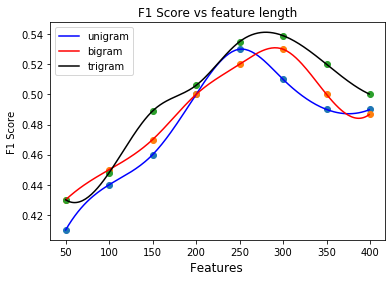

In [0]:
from scipy.interpolate import UnivariateSpline
x = np.array([50,100,150,200,250,300,350,400])
y1 = np.array([0.41, 0.44,0.46,0.5,0.53,0.51,0.49,0.49])
y2 = np.array([0.43, 0.45,0.47,0.5,0.52,0.53,0.5,0.487])
y3 = np.array([0.43, 0.448,0.489,0.506,0.535,0.539,0.52,0.5])
s1 = UnivariateSpline(x, y1, s=0)
s2 = UnivariateSpline(x, y2, s=0)
s3 = UnivariateSpline(x, y3, s=0)
xs = np.linspace(50, 399, 200)
ys1 = s1(xs)
ys2 = s2(xs)
ys3 = s3(xs)
plt.plot(x,y1,'o')
plt.plot(x,y2,'o')
plt.plot(x,y3,'o')
plt.plot(xs,ys1,'b',label='unigram')
plt.plot(xs,ys2,'r',label='bigram')
plt.plot(xs,ys3,'k',label='trigram')
plt.legend(loc='upper left')

# dfPlot = pd.DataFrame({'count':x,'f1':y})
# print(dfPlot)
# plt.figure(figsize=(9,6))
# ax= sns.regplot(x='count', y='f1' ,data=dfPlot )
plt.title("F1 Score vs feature length")
plt.xlabel('Features ', fontsize=12)
plt.ylabel('F1 Score')
plt.show()